In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
import pandas as pd
df_tsla = pd.read_csv('/content/TSLA.csv')
print(df_tsla.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [ ]:
df_tsla['Date'] = pd.to_datetime(df_tsla['Date'])
df_tsla.set_index('Date', inplace=True)

In [ ]:
tsla_ts = df_tsla['Close']

In [ ]:
def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:', result[4])
    if result[1] > 0.05:
        print("Time series is NOT stationary.")
    else:
        print("Time series is stationary.")

print("\n=== ADF Test Before Differencing (Tesla) ===")
adf_test(tsla_ts)


=== ADF Test Before Differencing (Tesla) ===
ADF Statistic: -0.9355414200426861
p-value: 0.7760429647483049
Critical Values: {'1%': np.float64(-3.4323017785053387), '5%': np.float64(-2.8624023818405093), '10%': np.float64(-2.5672290628563172)}
Time series is NOT stationary.


In [ ]:
tsla_diff = tsla_ts.diff().dropna()

print("\n=== ADF Test After First Differencing (Tesla) ===")
adf_test(tsla_diff)


=== ADF Test After First Differencing (Tesla) ===
ADF Statistic: -11.127007405545282
p-value: 3.354603554354272e-20
Critical Values: {'1%': np.float64(-3.4323017785053387), '5%': np.float64(-2.8624023818405093), '10%': np.float64(-2.5672290628563172)}
Time series is stationary.


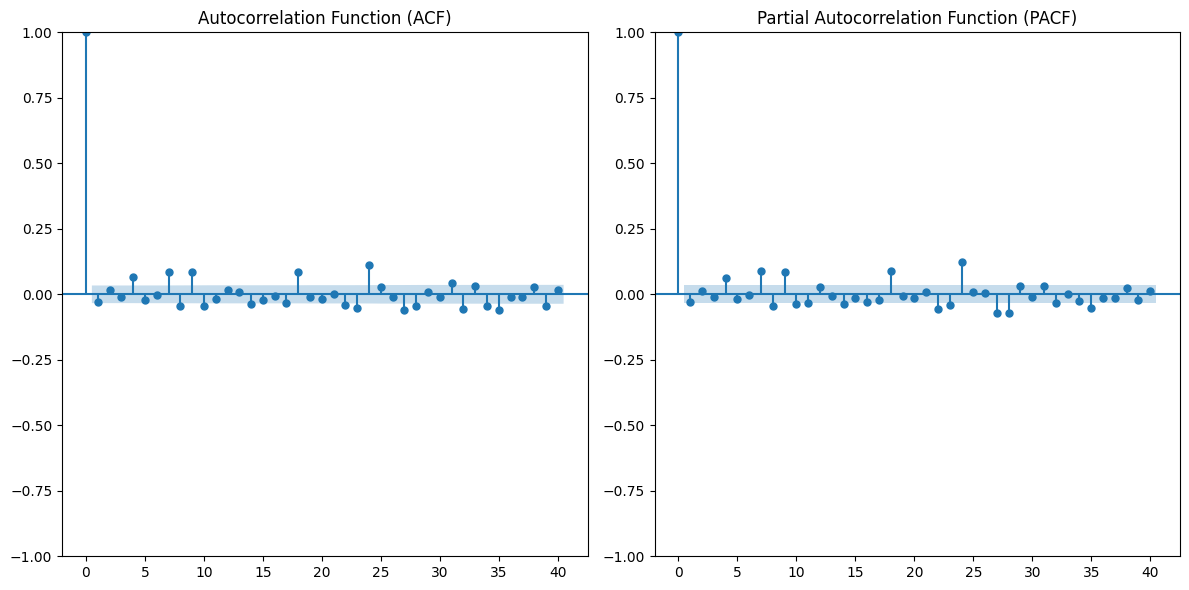

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(tsla_diff, lags=40, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")
plt.subplot(122)
plot_pacf(tsla_diff, lags=40, ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.show()

In [ ]:
arima_model = sm.tsa.ARIMA(tsla_ts, order=(1,1,1))  # (p,d,q)
arima_result = arima_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


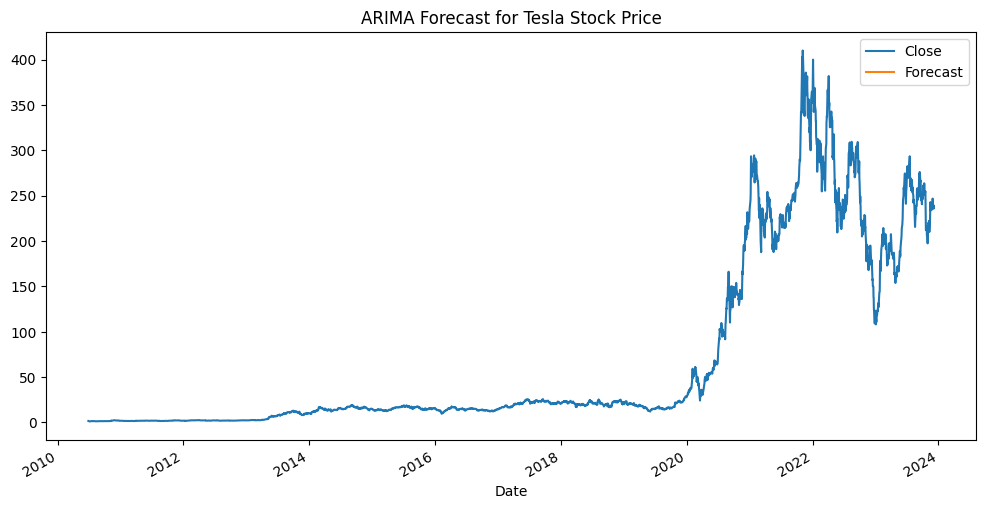

In [ ]:
df_tsla['Forecast'] = arima_result.predict(start=len(tsla_ts)-30, end=len(tsla_ts)+30, dynamic=True)
df_tsla[['Close', 'Forecast']].plot(figsize=(12,6), title="ARIMA Forecast for Tesla Stock Price")
plt.show()